<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/miniproject1_78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/esaa/data/movies_train.csv')
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


* dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.
* release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
train['release_time'] = pd.to_datetime(train['release_time'])

In [ ]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.00,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.00,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.00,0,138,3,868


In [ ]:
# 7. 장르, 관객수- genre, dir_prev_bfnum
# 8. 배급사, 장르- distributor, genre

### **7. 장르와 관객수의 상관관계**

In [ ]:
genre_boxoffnum = train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')  # 장르별 평균 관객수
genre_boxoffnum.reset_index(inplace=True)
genre_boxoffnum

,genre,box_off_num
0,뮤지컬,6.627000e+03
1,다큐멘터리,6.717226e+04
2,서스펜스,8.261100e+04
3,애니메이션,1.819267e+05
4,멜로/로맨스,4.259680e+05
5,미스터리,5.275482e+05
6,공포,5.908325e+05
7,드라마,6.256898e+05
8,코미디,1.193914e+06
9,SF,1.788346e+06


Text(0.5, 1.0, '장르별 평균 관객수')

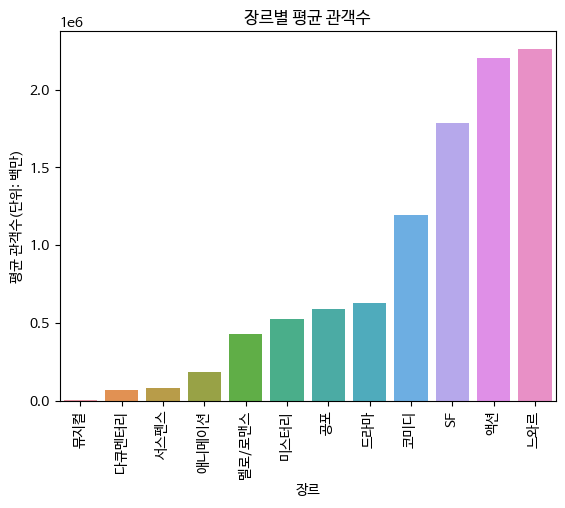

In [ ]:
plt.xticks(rotation=90)
ax=sns.barplot(data=genre_boxoffnum, x='genre', y='box_off_num')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객수(단위: 백만)')
ax.set_title('장르별 평균 관객수')

# 액션과 느와르 장르의 평균 관객수가 많은 편, 평균 관객수가 가장 적은 장르는 뮤지컬

---

###**8. 배급사와 장르**

In [ ]:
train['distributor'].value_counts().sort_values(ascending=False)[:20]

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
시네마달         10
어뮤즈          10
(주)키노아이      10
시너지          10
인디플러그         9
KT&G 상상마당     8
NEW           8
인벤트 디         8
스폰지           7
무비꼴라쥬         6
Name: distributor, dtype: int64

In [ ]:
# 배급 영화가 20개 이상인 배급사만

cj = train[train['distributor'] == 'CJ 엔터테인먼트']
lotte = train[train['distributor'] == '롯데엔터테인먼트']
new = train[train['distributor'] == '(주)NEW']
mountainpictures = train[train['distributor'] == '(주)마운틴픽쳐스']
showbox = train[train['distributor'] == '(주)쇼박스']
indiestory = train[train['distributor'] == '인디스토리']

In [ ]:
# 파이 차트 그리기 위한 비율 계산

cj_pie = pd.DataFrame(cj['genre'].value_counts() / cj['genre'].count()); cj_pie.reset_index(inplace=True)
lotte_pie = pd.DataFrame(lotte['genre'].value_counts() / lotte['genre'].count()); lotte_pie.reset_index(inplace=True)
new_pie = pd.DataFrame(new['genre'].value_counts() / new['genre'].count()); new_pie.reset_index(inplace=True)
mountainpictures_pie = pd.DataFrame(mountainpictures['genre'].value_counts() / mountainpictures['genre'].count()); mountainpictures_pie.reset_index(inplace=True)
showbox_pie = pd.DataFrame(showbox['genre'].value_counts() / showbox['genre'].count()); showbox_pie.reset_index(inplace=True)
indiestory_pie = pd.DataFrame(indiestory['genre'].value_counts() / indiestory['genre'].count()); indiestory_pie.reset_index(inplace=True)

Text(0.5, 1.0, 'CJ 엔터테인먼트 영화 장르 비율')

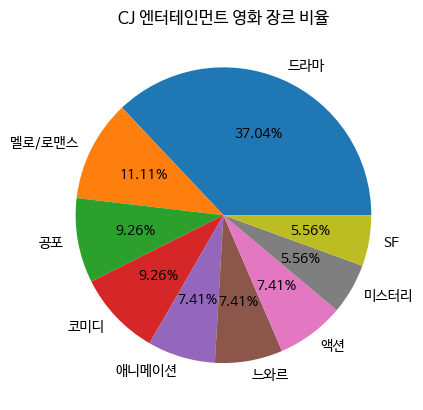

In [ ]:
plt.pie(x=list(cj_pie['genre']), labels=list(cj_pie['index']), autopct='%.2f%%')
plt.title('CJ 엔터테인먼트 영화 장르 비율')

Text(0.5, 1.0, '롯데엔터테인먼트 영화 장르 비율')

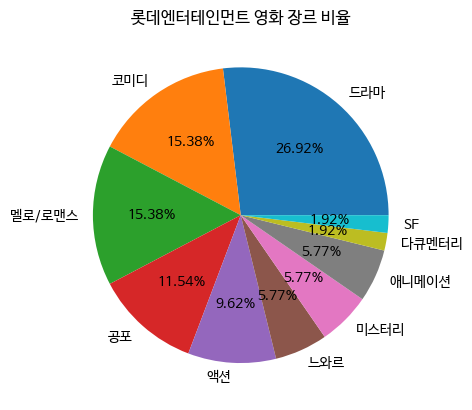

In [ ]:
plt.pie(x=list(lotte_pie['genre']), labels=list(lotte_pie['index']), autopct='%.2f%%')
plt.title('롯데엔터테인먼트 영화 장르 비율')

Text(0.5, 1.0, '(주)NEW 영화 장르 비율')

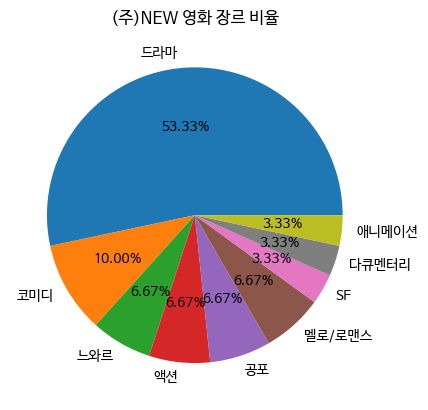

In [ ]:
plt.pie(x=list(new_pie['genre']), labels=list(new_pie['index']), autopct='%.2f%%')
plt.title('(주)NEW 영화 장르 비율')

Text(0.5, 1.0, '(주)마운틴픽쳐스 영화 장르 비율')

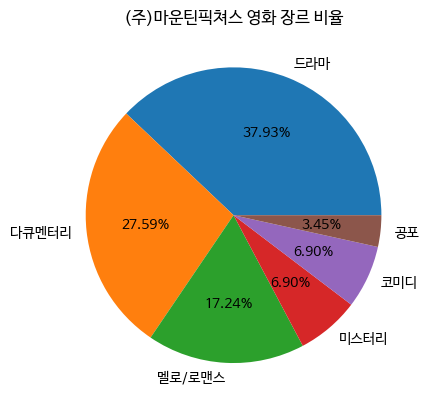

In [ ]:
plt.pie(x=list(mountainpictures_pie['genre']), labels=list(mountainpictures_pie['index']), autopct='%.2f%%')
plt.title('(주)마운틴픽쳐스 영화 장르 비율')

Text(0.5, 1.0, '(주)쇼박스 영화 장르 비율')

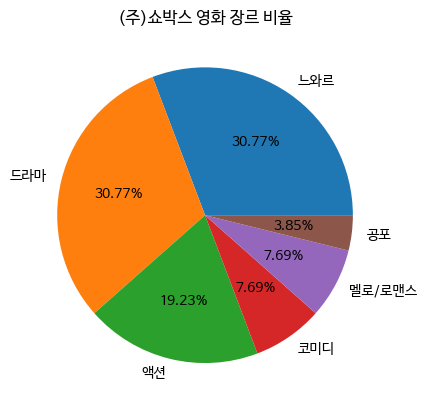

In [ ]:
plt.pie(x=list(showbox_pie['genre']), labels=list(showbox_pie['index']), autopct='%.2f%%')
plt.title('(주)쇼박스 영화 장르 비율')

Text(0.5, 1.0, '인디스토리 영화 장르 비율')

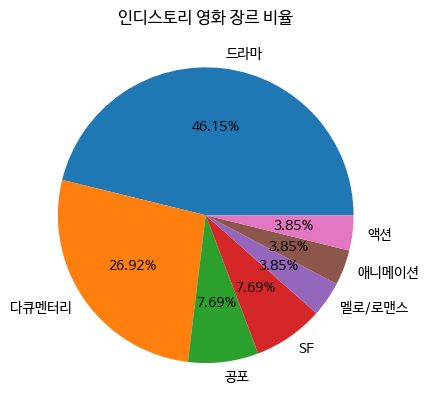

In [ ]:
plt.pie(x=list(indiestory_pie['genre']), labels=list(indiestory_pie['index']), autopct='%.2f%%')
plt.title('인디스토리 영화 장르 비율')

In [ ]:
# 장르별 평균 관객수는 액션과 느와르에서 높게 나타나는데 배급 영화가 많은 회사에서의 주된 배급 영화 장르는 드라마

<Axes: xlabel='distributor,genre'>

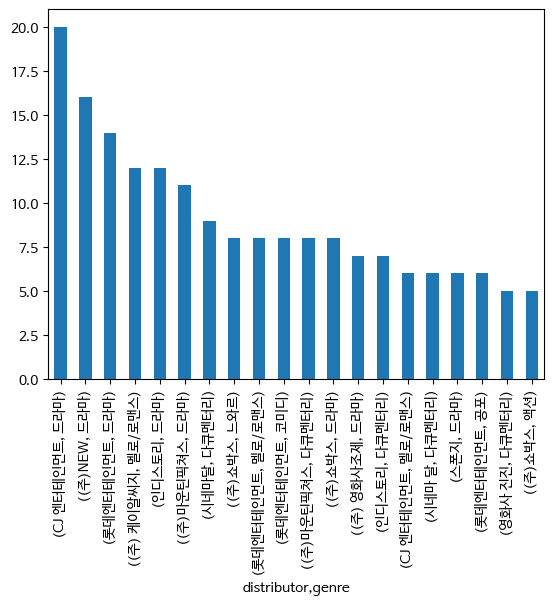

In [ ]:
# +
train[['distributor', 'genre']].groupby('distributor').value_counts().sort_values(ascending=False)[:20].plot(kind='bar')

In [ ]:
# +
train[['distributor', 'box_off_num']].groupby('distributor').mean().sort_values('box_off_num', ascending=False)[:20]  # 배급사별 평균 관객수(내림차순)

,box_off_num
distributor,
CJ E&M Pictures,4.122337e+06
(주)쇼박스,3.386656e+06
(주)아이필름코퍼레이션,3.117859e+06
쇼박스(주)미디어플렉스,2.634823e+06
영구아트무비,2.541603e+06
CJ E&M 영화부문,2.505309e+06
(주)NEW,2.184405e+06
CJ 엔터테인먼트,2.162742e+06
이십세기폭스코리아(주),1.637046e+06
